Enem - Comparação da média das notas do aluno com a Renda e escolaridade dos seus pais.

O objetivo do trabalho é relacionar a renda familiar e o estudo dos pais do aluno com a média das notas obtidas no enem de 2014 e 2015 utilizando a regressão linear.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from math import *
from scipy.stats import *

In [40]:
%matplotlib inline
import cmath
plt.style.use('ggplot')

import itertools
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm2  #Usa OLS como no R

In [3]:
dados15 = pd.read_csv('dados15resumo.csv', encoding="latin1", sep=',')

In [4]:
DADOS15 = dados15[pd.notnull(dados15.NU_ANO)&pd.notnull(dados15.NU_INSCRICAO)&pd.notnull(dados15.NU_NOTA_CN)&pd.notnull(dados15.NU_NOTA_CH)&pd.notnull(dados15.NU_NOTA_LC)&pd.notnull(dados15.NU_NOTA_MT)&pd.notnull(dados15.Q001)&pd.notnull(dados15.Q002)&pd.notnull(dados15.Q003)&pd.notnull(dados15.Q004)&pd.notnull(dados15.Q005)&pd.notnull(dados15.Q006)]


Os dados escolhido para verificar essa relação são a renda familiar, o nível de graduação do pai e da mãe, a quantidade de moradores da casa (pensando em organizar a renda per capta se melhorar a relação) e, em 2015 o trabalho que exercem pai e mãe. Essa última escolha está aí apensa como possível relação, mas não será utilizada se não for necessário.

In [5]:
DADOS15.Q001 = DADOS15.Q001.astype('category')
DADOS15.Q001.cat.categories = (['NUNCA', '5ANO INCOMPLETO','9ANO INCOMPLETO','EM INCOMPLETO','FACULDADE INCOMPLETA','PÓS INCOMPLETA','COMPLETOU PÓS','NÃO SEI'])
DADOS15.Q002 = DADOS15.Q002.astype('category')
DADOS15.Q002.cat.categories = (['NUNCA', '5ANO INCOMPLETO','9ANO INCOMPLETO','EM INCOMPLETO','FACULDADE INCOMPLETA','PÓS INCOMPLETA','COMPLETOU PÓS','NÃO SEI'])
DADOS15.Q003 = DADOS15.Q003.astype('category')
DADOS15.Q003.cat.categories = (['LAVRADOR...', 'DIARISTA, VIGILANTE...','PADEIRO, MECÂNICO(A)','PROFESSOR, CORRETOR...','MÉDICO, ENGENHEIRO...','NÃO SEI'])
DADOS15.Q004 = DADOS15.Q004.astype('category')
DADOS15.Q004.cat.categories = (['LAVRADOR...', 'DIARISTA, VIGILANTE...','PADEIRO, MECÂNICO(A)','PROFESSOR, CORRETOR...','MÉDICO, ENGENHEIRO...','NÃO SEI'])
DADOS15.Q006 = DADOS15.Q006.astype('category')
DADOS15.Q006.cat.categories = (['NENHUMA', 'ATÉ 788','ATÉ 1182','ATÉ 1572','ATÉ1970','ATÉ 2364', 'ATÉ 3152','ATÉ 3940','ATÉ 4728','ATÉ 5516', 'ATÉ 6304', 'ATÉ 7092','ATÉ 7880','ATÉ 9456','ATÉ 11820', 'ATÉ 15760','ACIMA DE 15760'])


DADOS15.head()

C:\Users\manucirne\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Unnamed: 0,NU_ANO,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006
0,0,2015,150000000376,657.4,705.3,591.1,732.3,760.0,NUNCA,NUNCA,LAVRADOR...,LAVRADOR...,3.0,ATÉ 1572
2,2,2015,150000001161,528.5,531.1,511.3,566.5,640.0,FACULDADE INCOMPLETA,9ANO INCOMPLETO,"PROFESSOR, CORRETOR...","DIARISTA, VIGILANTE...",3.0,ATÉ 788
4,4,2015,150000001219,679.9,730.6,621.2,732.4,800.0,5ANO INCOMPLETO,9ANO INCOMPLETO,"PADEIRO, MECÂNICO(A)",LAVRADOR...,5.0,ATÉ 3152
5,5,2015,150000002884,598.7,658.0,579.0,576.4,480.0,EM INCOMPLETO,9ANO INCOMPLETO,"DIARISTA, VIGILANTE...",NÃO SEI,4.0,ATÉ 2364
6,6,2015,150000002510,652.1,671.9,609.3,685.5,820.0,PÓS INCOMPLETA,PÓS INCOMPLETA,"MÉDICO, ENGENHEIRO...","MÉDICO, ENGENHEIRO...",3.0,ATÉ 5516


O próximo passo é organizar a média das notas, já que, no enem elas são separadas. 

In [6]:
MEDIA = 0
MEDIA = (DADOS15.NU_NOTA_CN + DADOS15.NU_NOTA_CH + DADOS15.NU_NOTA_LC + DADOS15.NU_NOTA_MT + DADOS15.NU_NOTA_REDACAO)/5


In [7]:
DADOS15['MEDIA'] = MEDIA

C:\Users\manucirne\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [8]:
DADOS15.columns = ["contagem","ANO","INSCRICAO","NOTA_CN","NOTA_CH","NOTA_LC","NOTA_MT","NOTA_REDACAO","ESTUDO_PAI","ESTUDO_MÃE","TRABALHO_PAI","TRABALHO_MAE","MORADORES_CASA","RENDA_FAMILIAR","MEDIA_NOTAS"]

O próximos gráficos são exploratórios. A ideia é ver se existe alguma difereça perceptível entre a de notas de pessoas com rendas diferentes. Para isso eu dividi a renda em dois blocos (renda alta e renda baixa) e plotei dois histogramas que me mostraram a incidência das notas em cada uma das novas listas. Foi possível observar diferenças entre as duas diferentes faixas de renda. Ela não é grande, mas existe. Sendo assim, pode ser interessante fazer uma regressão e observar com mais atenção as relações visualizadas.

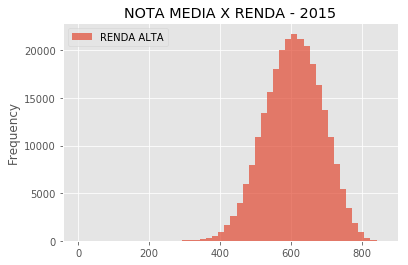

In [9]:
DADOS15_RB = DADOS15[((DADOS15.RENDA_FAMILIAR) == 'NENHUMA')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 788')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 1182')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 1572')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ1970')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 2364')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 3152')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 3940')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 4728')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 5516')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 6304')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 7092')]
DADOS15_RA = DADOS15[((DADOS15.RENDA_FAMILIAR) == 'ATÉ 7880')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 9456')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 11820')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 15760')|((DADOS15.RENDA_FAMILIAR) == 'ACIMA DE 15760')]
PLOT1 = DADOS15_RA.MEDIA_NOTAS.plot.hist(bins=50,title='NOTA MEDIA X RENDA - 2015', alpha=0.7, label='RENDA ALTA')
plt.legend()

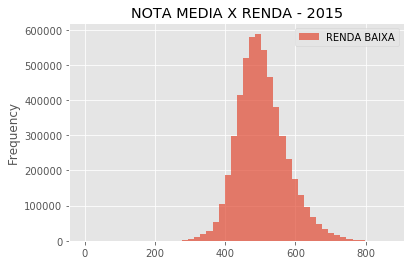

In [10]:
PLOT1 = DADOS15_RB.MEDIA_NOTAS.plot.hist(bins = 50,title='NOTA MEDIA X RENDA - 2015', alpha=0.7, label='RENDA BAIXA')
plt.legend()

O próximo passo foi transformar a variável renda qulitativa em uma variável quantitativa. Criei uma nova coluna para a renda quantitativa e atribui valores médios a cada faixa de renda descrita na coluna de renda qualitativa. 

In [11]:
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='NENHUMA'),'RENDAQT'] = 1
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 788'),'RENDAQT'] = 394
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 1182'),'RENDAQT'] = 985
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 1572'),'RENDAQT'] = 1377
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ1970'),'RENDAQT'] = 1771
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 2364'),'RENDAQT'] = 2167
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 3152'),'RENDAQT'] = 2758
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 3940'),'RENDAQT'] = 3546
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 4728'),'RENDAQT'] = 4334
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 5516'),'RENDAQT'] = 5122
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 6304'),'RENDAQT'] = 5910
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 7880'),'RENDAQT'] = 7092
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 9456'),'RENDAQT'] = 8668
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 11820'),'RENDAQT'] = 10638
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 15760'),'RENDAQT'] = 13790
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='MAIOR QUE 15760'),'RENDAQT'] = 20000 #ainda é um chute, mas será baseado com uma média da PNAD


C:\Users\manucirne\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\manucirne\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Aqui fiz uma nova coluna para uma variável de renda per capta. Ela foi feita para testar a possibilidade de minimizar um efeito visualmente estranho que obtive no gráfico da regressão, mas não funcionou como previsto, então acabei por não usá-lo.

In [12]:
DADOS15["RENDAPQ"] = DADOS15.RENDAQT/DADOS15.MORADORES_CASA

C:\Users\manucirne\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Nesse passo criei uma coluna para o logaritmo da renda familiar. Essa foi uma outra tentativa de minimizar a estranheza do gráfico, mas também não fez diferença no gráfico final.

In [13]:
DADOS15["RENDALOG"] = np.log10(DADOS15.RENDAQT)

C:\Users\manucirne\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
DADOS15 = DADOS15[pd.notnull(DADOS15.RENDAQT)]

In [15]:
pd.ols(x=DADOS15.RENDAQT, y=DADOS15.MEDIA_NOTAS)

C:\Users\manucirne\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         5484904
Number of Degrees of Freedom:   2

R-squared:         0.1737
Adj R-squared:     0.1737

Rmse:             65.0609

F-stat (1, 5484902): 1153012.8456, p-value:     0.0000

Degrees of Freedom: model 1, resid 5484902

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.0142     0.0000    1073.78     0.0000     0.0142     0.0142
     intercept   481.0277     0.0370   12986.56     0.0000   480.9551   481.1003
---------------------------------End of Summary---------------------------------

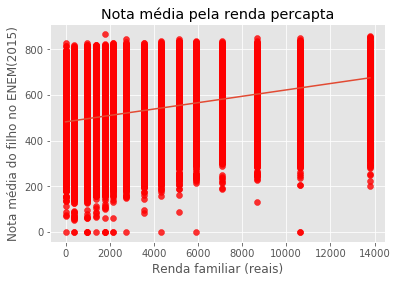

In [16]:
plt.scatter(DADOS15.RENDAQT,DADOS15.MEDIA_NOTAS, c='red', alpha=0.8)
plt.plot((DADOS15.RENDAQT.min(),DADOS15.RENDAQT.max()),(0.0140*DADOS15.RENDAQT.min()+482.4972,0.0140*DADOS15.RENDAQT.max()+482.4972))
plt.title('Nota média pela renda percapta')
plt.xlabel('Renda familiar (reais)')
plt.ylabel('Nota média do filho no ENEM(2015)')

In [17]:
DADOS15.RENDAQT.corr( DADOS15.MEDIA_NOTAS)

0.41677459145959916

É possível observar que existe uma relação entre renda familiar e a nota do aluno no enem. A regressão não apresenta números muito altos para a relação, mas de fato ela existe. o R^2 é de 0.177 e o Pvalue de 0, o que deixa claro que essa relação não pode ser descartada. Ao mesmo tempo, o número de correleção mostrado acima, de 0.42 também é relevante e comprova a influência que a renda tem no melhor desempenho do aluno.

In [18]:
DADOS15.loc[(DADOS15.ESTUDO_PAI=='NUNCA'),'ESTUDOPQT'] = 1
DADOS15.loc[(DADOS15.ESTUDO_PAI=='5ANO INCOMPLETO'),'ESTUDOPQT'] = 4
DADOS15.loc[(DADOS15.ESTUDO_PAI=='9ANO INCOMPLETO'),'ESTUDOPQT'] = 8
DADOS15.loc[(DADOS15.ESTUDO_PAI=='EM INCOMPLETO'),'ESTUDOPQT'] = 11
DADOS15.loc[(DADOS15.ESTUDO_PAI=='FACULDADE INCOMPLETA'),'ESTUDOPQT'] = 15
DADOS15.loc[(DADOS15.ESTUDO_PAI=='PÓS INCOMPLETA'),'ESTUDOPQT'] = 17
DADOS15.loc[(DADOS15.ESTUDO_PAI=='COMPLETOU PÓS'),'ESTUDOPQT'] = 19


In [19]:
pd.ols(x=DADOS15.ESTUDOPQT, y=DADOS15.MEDIA_NOTAS)

C:\Users\manucirne\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         4972285
Number of Degrees of Freedom:   2

R-squared:         0.1090
Adj R-squared:     0.1090

Rmse:             67.9317

F-stat (1, 4972283): 608442.0748, p-value:     0.0000

Degrees of Freedom: model 1, resid 4972283

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     4.5233     0.0058     780.03     0.0000     4.5119     4.5347
     intercept   464.1927     0.0653    7111.02     0.0000   464.0648   464.3206
---------------------------------End of Summary---------------------------------

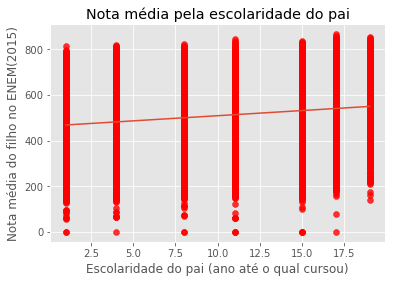

In [20]:
plt.scatter(DADOS15.ESTUDOPQT,DADOS15.MEDIA_NOTAS, c='red', alpha=0.8)
plt.plot((DADOS15.ESTUDOPQT.min(),DADOS15.ESTUDOPQT.max()),(4.5233*DADOS15.ESTUDOPQT.min()+464.1927,4.5233*DADOS15.ESTUDOPQT.max()+464.1927))
plt.title('Nota média pela escolaridade do pai')
plt.xlabel('Escolaridade do pai (ano até o qual cursou)')
plt.ylabel('Nota média do filho no ENEM(2015)')

In [21]:
DADOS15.ESTUDOPQT.corr( DADOS15.MEDIA_NOTAS)

0.33019029570772551

Assim como foi observado em relação à renda familiar, o estudo do pai tem influência na nota média do filhos e, apesar de os valores não serem muito altos, eles existem. O R^2 de 0.10,apesar de baixo, tem influência na nota do aluno e isso pode ser observado também pelo valor do Pvalue que é zero e da correlção que é igual a 0.33.

In [22]:
DADOS15.loc[(DADOS15.ESTUDO_MÃE=='NUNCA'),'ESTUDOMQT'] = 1
DADOS15.loc[(DADOS15.ESTUDO_MÃE=='5ANO INCOMPLETO'),'ESTUDOMQT'] = 4
DADOS15.loc[(DADOS15.ESTUDO_MÃE=='9ANO INCOMPLETO'),'ESTUDOMQT'] = 8
DADOS15.loc[(DADOS15.ESTUDO_MÃE=='EM INCOMPLETO'),'ESTUDOMQT'] = 11
DADOS15.loc[(DADOS15.ESTUDO_MÃE=='FACULDADE INCOMPLETA'),'ESTUDOMQT'] = 15
DADOS15.loc[(DADOS15.ESTUDO_MÃE=='PÓS INCOMPLETA'),'ESTUDOMQT'] = 17
DADOS15.loc[(DADOS15.ESTUDO_MÃE=='COMPLETOU PÓS'),'ESTUDOMQT'] = 19

pd.ols(x=DADOS15.ESTUDOMQT, y=DADOS15.MEDIA_NOTAS)


C:\Users\manucirne\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         5278234
Number of Degrees of Freedom:   2

R-squared:         0.0956
Adj R-squared:     0.0956

Rmse:             68.0551

F-stat (1, 5278232): 557866.4235, p-value:     0.0000

Degrees of Freedom: model 1, resid 5278232

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     4.2628     0.0057     746.90     0.0000     4.2517     4.2740
     intercept   461.2857     0.0698    6608.32     0.0000   461.1489   461.4225
---------------------------------End of Summary---------------------------------

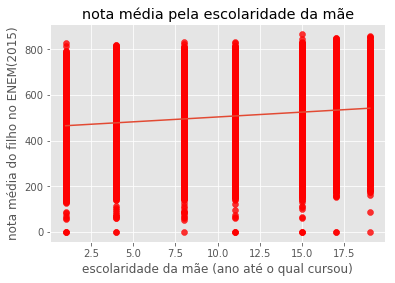

In [23]:
plt.scatter(DADOS15.ESTUDOMQT,DADOS15.MEDIA_NOTAS, c='red', alpha=0.8)
plt.plot((DADOS15.ESTUDOMQT.min(),DADOS15.ESTUDOMQT.max()),(4.2628*DADOS15.ESTUDOMQT.min()+461.2857,4.2628*DADOS15.ESTUDOMQT.max()+461.2857))
plt.title('nota média pela escolaridade da mãe')
plt.xlabel('escolaridade da mãe (ano até o qual cursou)')
plt.ylabel('nota média do filho no ENEM(2015)')

In [24]:
DADOS15.ESTUDOMQT.corr( DADOS15.MEDIA_NOTAS)

0.30917460014846421

O estudo da mãe tem inflência muito semelhante ao estudo do pai. Não t.em R^2 alto, mas também não pode ser ignorado, visto que o Pvalue é zero e o coefixiente de correlação é 0.31. 

In [25]:
DADOS15 = DADOS15[pd.notnull(DADOS15.RENDAQT)&pd.notnull(DADOS15.ESTUDOPQT)&pd.notnull(DADOS15.ESTUDOMQT)]

In [26]:
import statsmodels.api as sm
Y = DADOS15['MEDIA_NOTAS']
X = DADOS15[['RENDAQT','ESTUDOPQT','ESTUDOMQT']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MEDIA_NOTAS   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                 4.582e+05
Date:                Tue, 21 Nov 2017   Prob (F-statistic):               0.00
Time:                        17:19:15   Log-Likelihood:            -2.7448e+07
No. Observations:             4925555   AIC:                         5.490e+07
Df Residuals:                 4925551   BIC:                         5.490e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        452.3101      0.071   6365.572      0.000       452.171   452.449
RENDAQT        0.0109   1.47e-05    740.721      0.000         0.011     0.011
ESTUDOPQT      1.7494      0.007    248.490      0.000         1.736     1.763
ESTUDOMQT      1.6988      0.007    243.481      0.000         1.685     1.712
==============================================================================
Omnibus:                    79094.083   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           109996.806
Skew:                           0.205   Prob(JB):                         0.00
Kurtosis:                       3.607   Cond. No.                     7.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Então, para enxergar os dados sob uma nova perspectiva resolvi fazer uma regressão múltipla e testar todas as relação ao mesmo tempo. A experiência foi interessante, visto que os valores que atribuem relevância ao resultado aumentaram mostrando que a conjunção desses fatores tem maior inflência na nota do aluno que apenas um deles isolado. O R^2 aumentou significativamente e o P-value continua igual a 0, o que também comprova a relevância da regressão. Mesmo assim essa não é uma regressão robusta e não pode ser considerada de alta relevância.

Para contiunuar o trabalho sob a mesma perspectiva resolvi testar mais um ano de enem e ver como esses mesmos fatores se comportaram em 2014.

In [27]:
dados14 = pd.read_csv('dados14resumo.csv', encoding="latin1", sep=',')

In [28]:
DADOS14 = dados14[pd.notnull(dados14.NU_ANO)&pd.notnull(dados14.NU_INSCRICAO)&pd.notnull(dados14.NOTA_CN)&pd.notnull(dados14.NOTA_CH)&pd.notnull(dados14.NOTA_LC)&pd.notnull(dados14.NOTA_MT)&pd.notnull(dados14.Q001)&pd.notnull(dados14.Q002)&pd.notnull(dados14.Q003)&pd.notnull(dados14.Q004)]
DADOS14.Q001 = DADOS14.Q001.astype('category')
DADOS14.Q001.cat.categories = (['NUNCA', '1 À 4','5 A 9','EM INCOMPLETO','EM COMPLETO','FACULDADE INCOMPLETA', 'FACULDADE COMPLETA','PÓS','NÃO SEI'])
DADOS14.Q002 = DADOS14.Q002.astype('category')
DADOS14.Q002.cat.categories = (['NUNCA', '1 À 4','5 A 9','EM INCOMPLETO','EM COMPLETO','FACULDADE INCOMPLETA', 'FACULDADE COMPLETA','PÓS','NÃO SEI'])
DADOS14.Q003 = DADOS14.Q003.astype('category')
DADOS14.Q003.cat.categories = (['NENHUMA', 'ATÉ 788','ATÉ 1182','ATÉ 1572','ATÉ1970','ATÉ 2364', 'ATÉ 3152','ATÉ 3940','ATÉ 4728','ATÉ 5516', 'ATÉ 6304', 'ATÉ 7092','ATÉ 7880','ATÉ 9456','ATÉ 11820', 'ATÉ 15760','ACIMA DE 15760'])


DADOS14.head()

C:\Users\manucirne\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Unnamed: 0,NU_ANO,NU_INSCRICAO,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004
0,0,2014,140000000001,536.9,570.2,576.1,478.3,560,1 À 4,EM COMPLETO,ATÉ1970,4
1,1,2014,140000000002,458.2,519.5,525.8,484.2,240,EM COMPLETO,5 A 9,ATÉ 1182,10
2,2,2014,140000000003,575.9,634.7,541.5,617.6,600,5 A 9,PÓS,ATÉ 6304,4
3,3,2014,140000000004,482.6,475.8,499.7,381.3,640,5 A 9,5 A 9,ATÉ 1182,5
4,4,2014,140000000005,612.6,700.7,596.5,648.2,580,1 À 4,EM COMPLETO,ATÉ 2364,4


In [29]:
MEDIA = 0
MEDIA = (DADOS14.NOTA_CN + DADOS14.NOTA_CH + DADOS14.NOTA_LC + DADOS14.NOTA_MT + DADOS14.NU_NOTA_REDACAO)/5
MEDIA
DADOS14['MEDIA'] = MEDIA


C:\Users\manucirne\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [30]:
DADOS14.columns = ["CONTAGEM","ANO","INSCRICAO","NOTA_CN","NOTA_CH","NOTA_LC","NOTA_MT","NOTA_REDACAO","ESTUDO_PAI","ESTUDO_MÃE","RENDA_FAMILIAR","MORADORES","MEDIA_NOTAS"]

In [31]:
DADOS14.loc[(DADOS14.RENDA_FAMILIAR=='NENHUMA'),'RENDAQT'] = 1
DADOS14.loc[(DADOS14.RENDA_FAMILIAR=='ATÉ 788'),'RENDAQT'] = 394
DADOS14.loc[(DADOS14.RENDA_FAMILIAR=='ATÉ 1182'),'RENDAQT'] = 985
DADOS14.loc[(DADOS14.RENDA_FAMILIAR=='ATÉ 1572'),'RENDAQT'] = 1377
DADOS14.loc[(DADOS14.RENDA_FAMILIAR=='ATÉ1970'),'RENDAQT'] = 1771
DADOS14.loc[(DADOS14.RENDA_FAMILIAR=='ATÉ 2364'),'RENDAQT'] = 2167
DADOS14.loc[(DADOS14.RENDA_FAMILIAR=='ATÉ 3152'),'RENDAQT'] = 2758
DADOS14.loc[(DADOS14.RENDA_FAMILIAR=='ATÉ 3940'),'RENDAQT'] = 3546
DADOS14.loc[(DADOS14.RENDA_FAMILIAR=='ATÉ 4728'),'RENDAQT'] = 4334
DADOS14.loc[(DADOS14.RENDA_FAMILIAR=='ATÉ 5516'),'RENDAQT'] = 5122
DADOS14.loc[(DADOS14.RENDA_FAMILIAR=='ATÉ 6304'),'RENDAQT'] = 5910
DADOS14.loc[(DADOS14.RENDA_FAMILIAR=='ATÉ 7880'),'RENDAQT'] = 7092
DADOS14.loc[(DADOS14.RENDA_FAMILIAR=='ATÉ 9456'),'RENDAQT'] = 8668
DADOS14.loc[(DADOS14.RENDA_FAMILIAR=='ATÉ 11820'),'RENDAQT'] = 10638
DADOS14.loc[(DADOS14.RENDA_FAMILIAR=='ATÉ 15760'),'RENDAQT'] = 13790
DADOS14.loc[(DADOS14.RENDA_FAMILIAR=='MAIOR QUE 15760'),'RENDAQT'] = 20000 #ainda é um chute, mas será baseado com uma média da PNAD


C:\Users\manucirne\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\manucirne\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [32]:
pd.ols(x=DADOS14.RENDAQT, y=DADOS14.MEDIA_NOTAS)

C:\Users\manucirne\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         5835508
Number of Degrees of Freedom:   2

R-squared:         0.1702
Adj R-squared:     0.1702

Rmse:             73.1158

F-stat (1, 5835506): 1196605.5679, p-value:     0.0000

Degrees of Freedom: model 1, resid 5835506

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.0168     0.0000    1093.89     0.0000     0.0167     0.0168
     intercept   466.3892     0.0399   11701.52     0.0000   466.3110   466.4673
---------------------------------End of Summary---------------------------------

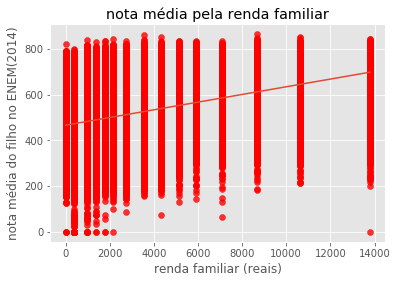

In [41]:
plt.scatter(DADOS14.RENDAQT,DADOS14.MEDIA_NOTAS, c='red', alpha=0.8)
plt.plot((DADOS14.RENDAQT.min(),DADOS14.RENDAQT.max()),(0.0168*DADOS14.RENDAQT.min()+466.3892,0.0168*DADOS14.RENDAQT.max()+466.3892))
plt.title('nota média pela renda familiar')
plt.xlabel('renda familiar (reais)')
plt.ylabel('nota média do filho no ENEM(2014)')

In [34]:
DADOS14.loc[(DADOS14.ESTUDO_PAI=='NUNCA'),'ESTUDOPQT'] = 1
DADOS14.loc[(DADOS14.ESTUDO_PAI=='1 À 4'),'ESTUDOPQT'] = 4
DADOS14.loc[(DADOS14.ESTUDO_PAI=='5 A 9'),'ESTUDOPQT'] = 8
DADOS14.loc[(DADOS14.ESTUDO_PAI=='EM INCOMPLETO'),'ESTUDOPQT'] = 11
DADOS14.loc[(DADOS14.ESTUDO_PAI=='EM COMPLETO'),'ESTUDOPQT'] = 12
DADOS14.loc[(DADOS14.ESTUDO_PAI=='FACULDADE INCOMPLETA'),'ESTUDOPQT'] = 15
DADOS14.loc[(DADOS14.ESTUDO_PAI=='FACULDADE COMPLETA'),'ESTUDOPQT'] = 17
DADOS14.loc[(DADOS14.ESTUDO_PAI=='PÓS'),'ESTUDOPQT'] = 19



C:\Users\manucirne\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\manucirne\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [43]:
pd.ols(x=DADOS14.ESTUDOPQT, y=DADOS14.MEDIA_NOTAS)

C:\Users\manucirne\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         5239438
Number of Degrees of Freedom:   2

R-squared:         0.1244
Adj R-squared:     0.1244

Rmse:             75.3824

F-stat (1, 5239436): 744642.9502, p-value:     0.0000

Degrees of Freedom: model 1, resid 5239436

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     5.8867     0.0068     862.93     0.0000     5.8733     5.9000
     intercept   447.4805     0.0665    6725.90     0.0000   447.3501   447.6109
---------------------------------End of Summary---------------------------------

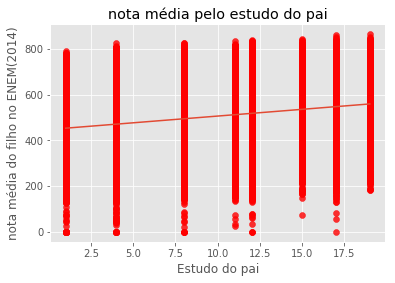

In [48]:
plt.scatter(DADOS14.ESTUDOPQT,DADOS14.MEDIA_NOTAS, c='red', alpha=0.8)
plt.plot((DADOS14.ESTUDOPQT.min(),DADOS14.ESTUDOPQT.max()),(5.8867*DADOS14.ESTUDOPQT.min()+447.4805,5.8867*DADOS14.ESTUDOPQT.max()+447.4805))
plt.title('nota média pelo estudo do pai')
plt.xlabel('Estudo do pai')
plt.ylabel('nota média do filho no ENEM(2014)')

In [35]:
DADOS14.loc[(DADOS14.ESTUDO_MÃE=='NUNCA'),'ESTUDOMQT'] = 1
DADOS14.loc[(DADOS14.ESTUDO_MÃE=='1 À 4'),'ESTUDOMQT'] = 4
DADOS14.loc[(DADOS14.ESTUDO_MÃE=='5 A 9'),'ESTUDOMQT'] = 8
DADOS14.loc[(DADOS14.ESTUDO_MÃE=='EM INCOMPLETO'),'ESTUDOMQT'] = 11
DADOS14.loc[(DADOS14.ESTUDO_MÃE=='EM COMPLETO'),'ESTUDOMQT'] = 12
DADOS14.loc[(DADOS14.ESTUDO_MÃE=='FACULDADE INCOMPLETA'),'ESTUDOMQT'] = 15
DADOS14.loc[(DADOS14.ESTUDO_MÃE=='FACULDADE COMPLETA'),'ESTUDOMQT'] = 17
DADOS14.loc[(DADOS14.ESTUDO_MÃE=='PÓS'),'ESTUDOMQT'] = 19

C:\Users\manucirne\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\manucirne\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [46]:
pd.ols(x=DADOS14.ESTUDOMQT, y=DADOS14.MEDIA_NOTAS)

C:\Users\manucirne\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         5239438
Number of Degrees of Freedom:   2

R-squared:         0.1126
Adj R-squared:     0.1126

Rmse:             75.8907

F-stat (1, 5239436): 664743.2884, p-value:     0.0000

Degrees of Freedom: model 1, resid 5239436

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     5.4591     0.0067     815.32     0.0000     5.4459     5.4722
     intercept   445.2572     0.0720    6184.23     0.0000   445.1161   445.3983
---------------------------------End of Summary---------------------------------

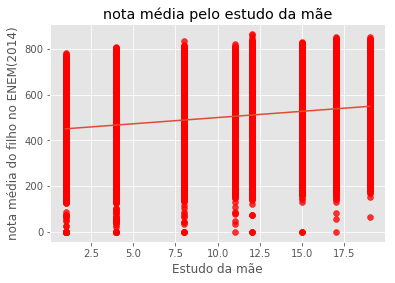

In [49]:
plt.scatter(DADOS14.ESTUDOMQT,DADOS14.MEDIA_NOTAS, c='red', alpha=0.8)
plt.plot((DADOS14.ESTUDOMQT.min(),DADOS14.ESTUDOMQT.max()),(5.4591*DADOS14.ESTUDOMQT.min()+445.2572,5.4591*DADOS14.ESTUDOMQT.max()+445.2572))
plt.title('nota média pelo estudo da mãe')
plt.xlabel('Estudo da mãe')
plt.ylabel('nota média do filho no ENEM(2014)')

In [36]:
DADOS14 = DADOS14[pd.notnull(DADOS14.RENDAQT)&pd.notnull(DADOS14.ESTUDOPQT)&pd.notnull(DADOS14.ESTUDOMQT)]

Y = DADOS14['MEDIA_NOTAS']
X = DADOS14[['RENDAQT','ESTUDOPQT','ESTUDOMQT']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MEDIA_NOTAS   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                 4.922e+05
Date:                Tue, 21 Nov 2017   Prob (F-statistic):               0.00
Time:                        17:21:05   Log-Likelihood:            -2.9780e+07
No. Observations:             5239438   AIC:                         5.956e+07
Df Residuals:                 5239434   BIC:                         5.956e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        435.9209      0.071   6104.004      0.000       435.781   436.061
RENDAQT        0.0120   1.73e-05    693.766      0.000         0.012     0.012
ESTUDOPQT      2.3669      0.008    282.326      0.000         2.351     2.383
ESTUDOMQT      2.1273      0.008    265.858      0.000         2.112     2.143
==============================================================================
Omnibus:                     6185.959   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7347.135
Skew:                           0.006   Prob(JB):                         0.00
Kurtosis:                       3.183   Cond. No.                     6.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Em 2014 foi possível observar um comportamento semelhante ao dos dados de 2015. A relação entrre as variáveis existe e pode ser visto com o valor de p-value e R^2, mas não é uma relação de grande relevância, o que me faz concluir que existem outras variáveis que também influênciam na nota, não podendo apensa essas serem consideradas de grande importância no contexto das notas dos alunos nas provas do enem.